# Bachelorarbeit - Evaluierung und Vergleich der Front-End Technologien Angular und React
## Andreas Kappel, BSWE, 2010859008

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Reading the input file and drop empty entries

In [5]:
log_df = pd.read_csv('log_api.csv')

In [6]:
log_df.dropna()

,browser,app,event,size,time
0,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.700000
1,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.600000
2,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.700000
3,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.700000
4,Chrome,Angular,domManipulation_BULK_REQUEST,3,0.600000
...,...,...,...,...,...
11995,Firefox,React,domManipulation_SINGLE_REQUESTS,300,3844.328406
11996,Firefox,React,domManipulation_SINGLE_REQUESTS,300,3617.381247
11997,Firefox,React,domManipulation_SINGLE_REQUESTS,300,3679.612386
11998,Firefox,React,domManipulation_SINGLE_REQUESTS,300,4684.240823


### Group by App and calculate min, max and average

In [81]:
app = 'React'
size = 3

labels = {
    'domManipulation_SINGLE_REQUESTS': 'Single Request',
    'domManipulation_BULK_REQUEST': 'Bulk Request'
}

app_df = log_df[(log_df['app'] == app) & (log_df['size'] == size)]

print('Info: ', app_df.shape, '\n')

app_df = app_df.replace(labels)
app_df.head()

Info:  (2000, 5) 



,browser,app,event,size,time
6000,Chrome,React,Bulk Request,3,23.700000
6001,Chrome,React,Bulk Request,3,14.600000
6002,Chrome,React,Bulk Request,3,16.747251
6003,Chrome,React,Bulk Request,3,15.400000
6004,Chrome,React,Bulk Request,3,17.200000


### Plot grouped dataframe as bar chart and boxplot

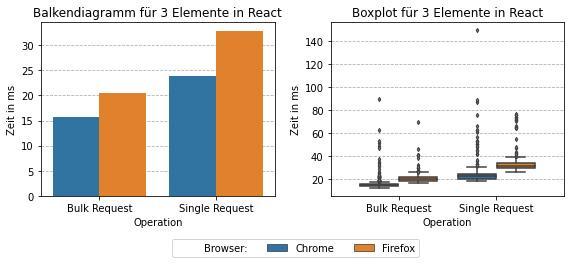

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw=dict(width_ratios=[1, 1]))
fig.tight_layout(w_pad=2.5)

sns.barplot(data=app_df, x='event', y='time', hue='browser', ax=axs[0], zorder=10, ci=None)
sns.boxplot(data=app_df, x='event', y='time', hue='browser', ax=axs[1], zorder=10, flierprops = dict(markerfacecolor = '0.5', markersize = 3))

for idx, ax in enumerate(axs):
    ax.set(xlabel='Operation', ylabel='Zeit in ms')
    ax.set(title=f"{'Balkendiagramm' if idx == 0 else 'Boxplot'} für {size} {'Elemente' if size != 1 else 'Element'} in {app}")
    if(idx > 0):
        h, l = ax.get_legend_handles_labels()
        ph = [plt.plot([], marker="", ls="")[0]]
        handles = ph + h
        labels = ['Browser:'] + l
        ax.legend(handles, labels, ncol=3, loc='center right', bbox_to_anchor=(0.4, -0.3))
    else:
        ax.legend([], [], frameon=False)
        plt.setp(ax.lines, zorder=100, label="")
    ax.grid(axis='y', linestyle='dashed', zorder=0)
    ax.set_axisbelow(True)

plt.savefig(f"./charts_v2/plot_{app}_{size}.png", bbox_inches="tight", transparent=True)